# EDB: Edit Control File and import gds

This example demonstrates how to import a gds layout for subsequent
simulation with HFSS.

Perform imports.

In [1]:
import os
import shutil
import tempfile

import pyedb
from pyedb.dotnet.edb_core.edb_data.control_file import ControlFile
from pyedb.misc.downloads import download_file


## Fetch Example Data

Download the EDB folder and copy it to a temporary folder.
The following files are used in this example:

- _sky130_fictious_dtc_exmple_contol_no_map.xml_
  defines physical information such
  as material properties, stackup layers, and boundary conditions.
- _dummy_layermap.map_
  maps properties to stackup layers.

In [2]:
temp_dir = tempfile.TemporaryDirectory(suffix=".ansys")
control_fn = "sky130_fictitious_dtc_example_control_no_map.xml"
gds_fn = "sky130_fictitious_dtc_example.gds"
layer_map = "dummy_layermap.map"

local_path = download_file("gds", destination=temp_dir.name)
c_file_in = os.path.join(local_path, control_fn)
c_map = os.path.join(local_path, layer_map)
gds_in = os.path.join(local_path, gds_fn)
gds_out = os.path.join(temp_dir.name, "gds_out.gds")
shutil.copy2(gds_in, gds_out)

'C:\\Users\\ansys\\AppData\\Local\\Temp\\tmpozt_i5yy.ansys\\gds_out.gds'

## Control file

A Control file is an xml file which purpose if to provide additional information during
import phase. It can include, materials, stackup, setup, boundaries and settings.
In this example we will import an existing xml, integrate it with a layer mapping file of gds
and then adding setup and boundaries.

In [3]:
c = ControlFile(c_file_in, layer_map=c_map)

## Set up simulation

This code sets up a simulation with HFSS and adds a frequency sweep.

In [4]:
setup = c.setups.add_setup("Setup1", "1GHz", 0.02, 10)
setup.add_sweep("Sweep1", "0.01GHz", "5GHz", "0.1GHz")

## Provide additional stackup settings

After import, you can change the stackup settings and add or remove layers or materials.

In [5]:
c.stackup.units = "um"
c.stackup.dielectrics_base_elevation = -100
c.stackup.metal_layer_snapping_tolerance = "10nm"
for via in c.stackup.vias:
    via.create_via_group = True
    via.snap_via_group = True

## Define boundary settings

Boundaries can include ports, components and boundary extent.

In [6]:
c.boundaries.units = "um"
c.boundaries.add_port("P1", x1=223.7, y1=222.6, layer1="Metal6", x2=223.7, y2=100, layer2="Metal6")
c.boundaries.add_extent()
comp = c.components.add_component("B1", "BGA", "IC", "Flip chip", "Cylinder")
comp.solder_diameter = "65um"
comp.add_pin("1", "81.28", "84.6", "met2")
comp.add_pin("2", "211.28", "84.6", "met2")
comp.add_pin("3", "211.28", "214.6", "met2")
comp.add_pin("4", "81.28", "214.6", "met2")
c.import_options.import_dummy_nets = True

## Write XML file

After all settings are ready, you can write an XML file.

In [7]:
c.write_xml(os.path.join(temp_dir.name, "output.xml"))

True

## Open EDB

Import the gds and open the edb.

In [8]:
# Select EDB version (change it manually if needed, e.g. "2024.2")
edb_version = "2024.2"
print(f"EDB version: {edb_version}")

edb = pyedb.Edb(gds_out, edbversion=edb_version, technology_file=os.path.join(temp_dir.name, "output.xml"))

EDB version: 2024.2


PyEDB INFO: StdOut is enabled


PyEDB INFO: Logger is initialized in EDB.


PyEDB INFO: legacy v0.37.0


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: Translation correctly completed


PyEDB INFO: Database gds_out.aedb Opened in 2024.2


PyEDB INFO: Cell TOP Opened


PyEDB INFO: Builder was initialized.


PyEDB INFO: EDB C:\Users\ansys\AppData\Local\Temp\tmpozt_i5yy.ansys\gds_out.aedb was created correctly from ds file.


PyEDB INFO: EDB initialized.


## Plot stackup

Plot the stackup.

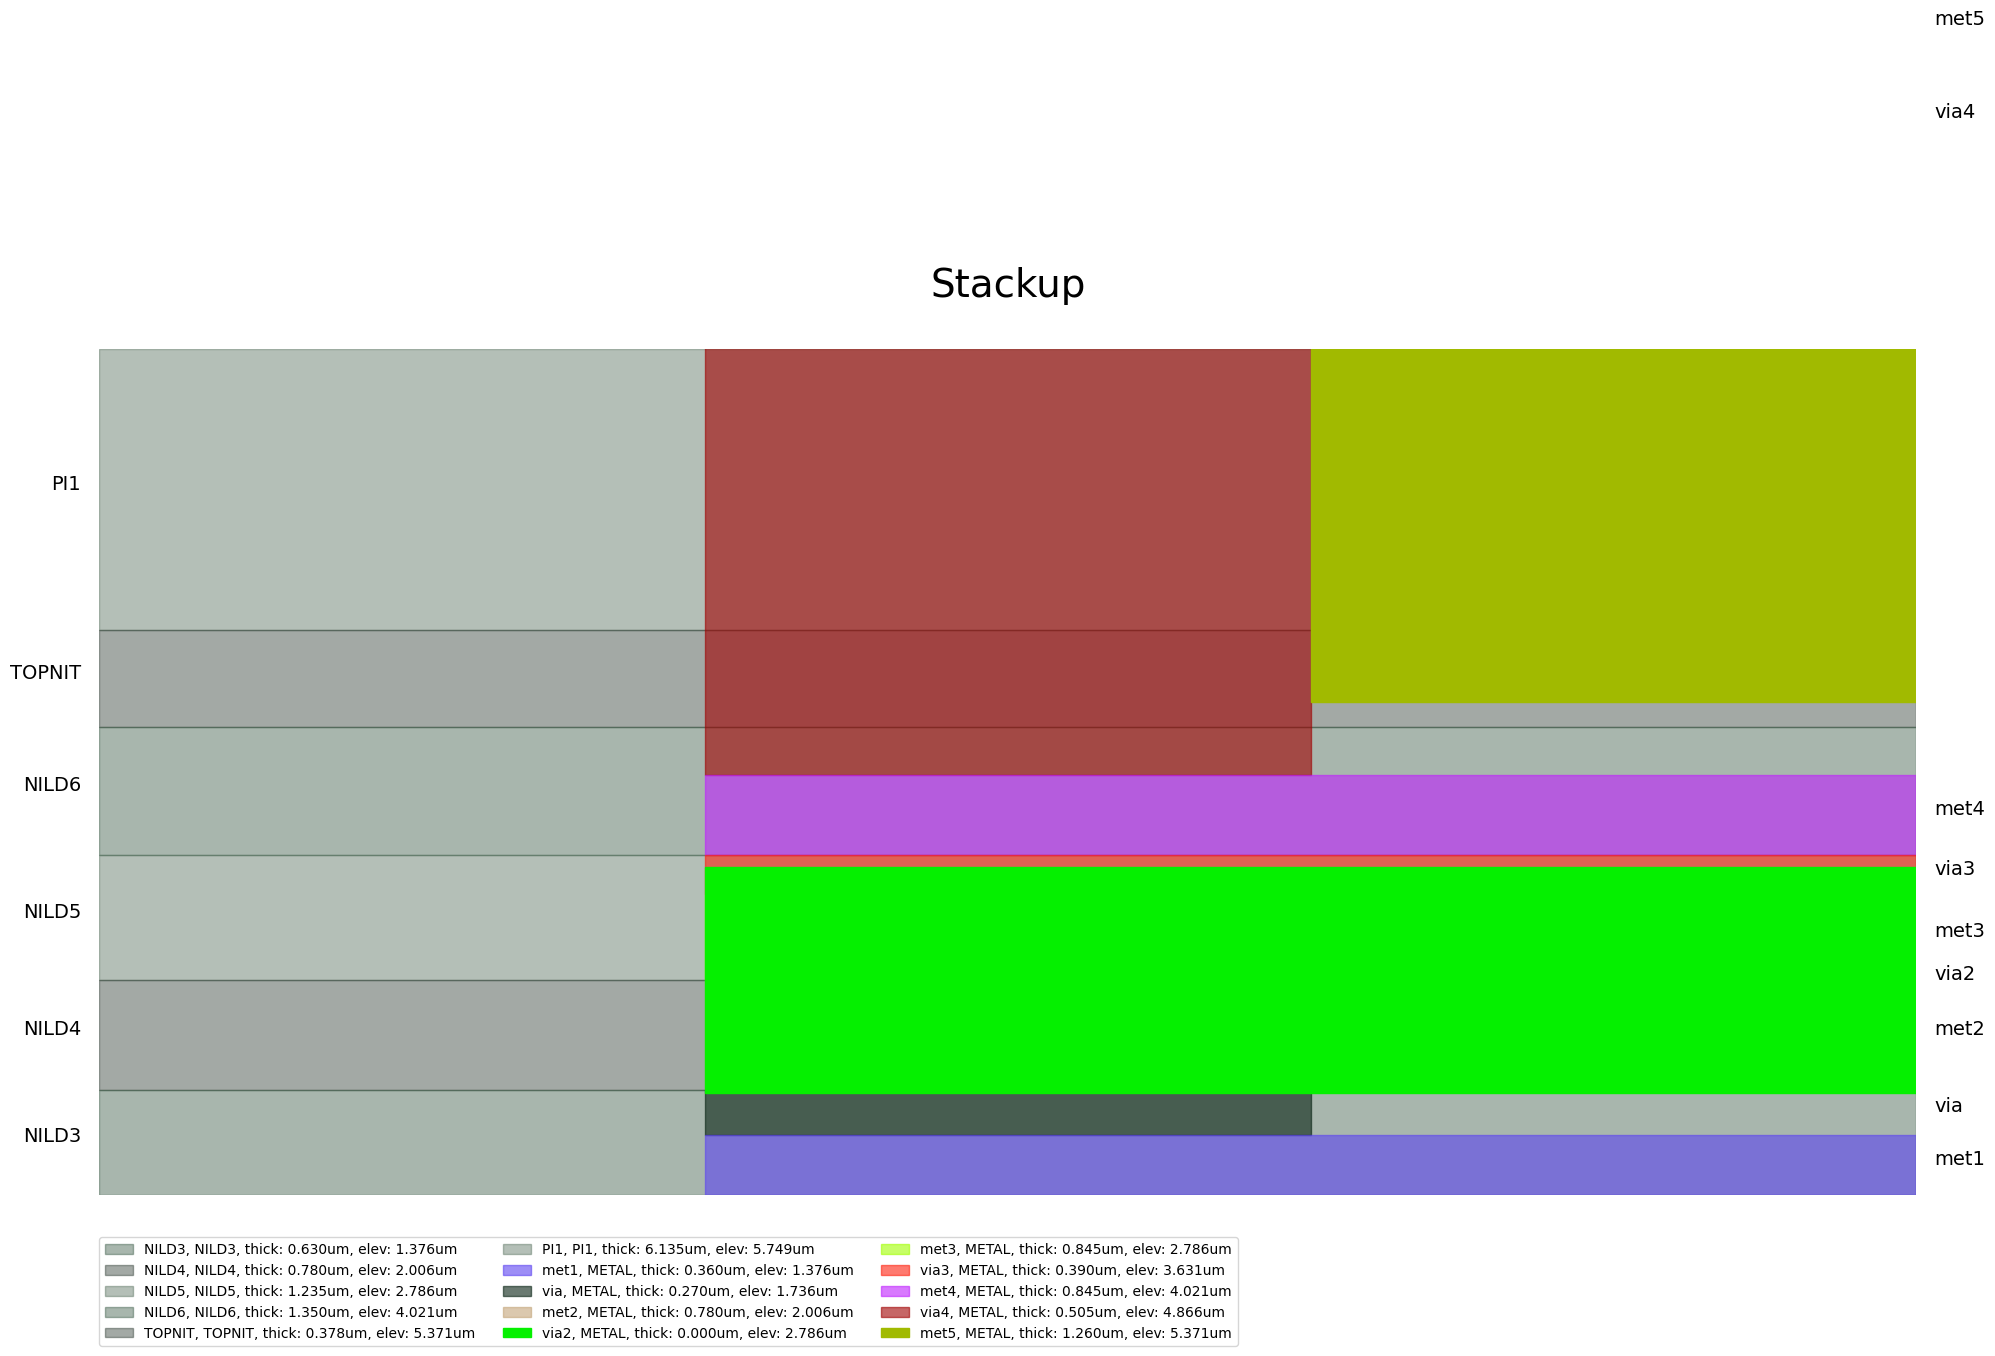

<module 'matplotlib.pyplot' from 'C:\\actions-runner\\_work\\pyaedt-examples\\pyaedt-examples\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
edb.stackup.plot(first_layer="met1")

## Close EDB

Close the project.

In [10]:
edb.close_edb()

PyEDB INFO: EDB file release time: 0.00ms


True

Clean up the temporary folder.

In [11]:
temp_dir.cleanup()